In [ ]:
# Importamos algunas librerías generales
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fijemos la semilla de numeros aleatorios para que los resultados sean reproducibles
np.random.seed(123458)

In [ ]:
# Importamos modelo lineal
from sklearn.linear_model import LinearRegression

In [ ]:
## Creación de datos sintéticos

# Variable independiente
x = np.arange(0.00, 3.01, 0.25)

# Coeficientes de la relación lineal
beta_0 = 1.00
beta_1 = 3.00

# Para evaluar polinomios es recomendable usar el método polyval de numpy
y = np.polyval([beta_1, beta_0], x)
y += np.random.normal(loc = 0.00, scale = 2.00, size = len(x))

En el siguiente bloque, creamos y ajustamos el modelo:

In [ ]:
## Ajuste del modelo

# Creación del modelo lineal (ver parámetros en la documentación)
reg = LinearRegression()

# Este cambio de dimensiones es necesario ya que scikit-learn espera que x sea una matriz
X = x.reshape(-1, 1)

# Ajuste del modelo
reg.fit(X, y)

# Coeficientes del modelo
beta_0_estimado = reg.intercept_
beta_1_estimado = reg.coef_[0]

print('Ordenada al origen = {:.3f}'.format(beta_0_estimado))
print('Pendiente = {:.3f}'.format(beta_1_estimado))

Ordenada al origen = 0.865
Pendiente = 3.194


#### Calidad del ajuste
Esta se mide mediante el coeficiente:
$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} $$
donde $\text{TSS} = \sum_i({y_i - \bar y})^2$ es la suma total de los cuadrados ($\bar y$ es la media muestral o promedio de $y$) y
$\text{RSS} = \sum_i({y_i - \hat y_i})^2$, donde $\hat y_i$ es el valor estimado de $y_i$. Un $R^2 \sim 1$ indica un buen ajuste de los datos.

In [ ]:
# Calidad del ajuste
print('Calidad de ajuste R^2 = {:.3f}'.format(reg.score(X, y)))

Calidad de ajuste R^2 = 0.713


Graficamos la relación real y la relación estimada a fin de comparar:

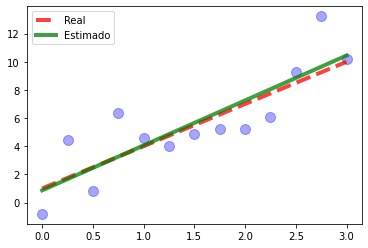

In [ ]:
## Graficos

fig, ax = plt.subplots(1, 1, figsize = (6, 4))

# Puntos de entrenamiento
ax.scatter(x, y, color = 'b', alpha = 0.35, s = 100)

# Relacion real
y_verdadero = np.polyval([beta_1, beta_0], x)
ax.plot(x, y_verdadero, color = 'r', linestyle = '--', linewidth = 4, alpha = 0.75)

# Relacion estimada
y_estimado = np.polyval([beta_1_estimado, beta_0_estimado], x)
ax.plot(x, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

ax.legend(['Real', 'Estimado'])
plt.show()

Con el modelo ajustado podemos predecir nuevos valores la variable $y$ a partir de nuevos valores de la variable independiente $x$:

In [ ]:
### Predicción de nuevos valores
x_nuevos = np.array([3.42, 0.65, 11.1])
print(reg.predict(x_nuevos.reshape(-1, 1)))

[11.78756121  2.94119648 36.3146663 ]


## [Regresión polinómica](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py)

La idea de la regresión polinómica es la de aprovechar toda la maquinaria del modelo lineal para describir no linealidades en los datos. La clave está es que un modelo del tipo:
$$ y \sim \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_m x_m$$
es lineal respecto de los parámetros, independientemente de quiénes sean las $x$'s (siempre y cuando cumplan las hipótesis presentadas en la clase anterior).

Por lo tanto, podemos tomar que $x_1 \equiv x$, $x_2 \equiv x^2$, ..., $x_m \equiv x^m$, y lo que obtenemos es una relación no lineal entre $y$ y $x$:
  $$ y \sim \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_m x^m$$
y utilizar cuadrados mínimos para estimar los valores de los coeficientes (encontrar los $\hat \beta_j$).

#### Datos sintéticos y ajuste del modelo

Para ganar un poco de *feeling* respecto a la regresión polinómica vamos a generar datos sintéticos a partir de una relación que conozcamos.
Esto nos permite jugar un poco y ver cómo funciona el ajuste con los datos.

Por supuesto, en un problema real nunca conoceremos cómo fueron generados los datos y la idea del ajuste es estimarla. Para estimar la relación real entre los datos vamos a tener que tomar algunas decisiones, como por ejemplo, qué variables son buenas para explicar a la variable dependiente y hasta qué grado incluímos estas variables si consideramos que la relación tiene que ser polinómica. Algunas cosas exploramos acá y otras en el transcurso de la materia.


Empezamos con la generación de datos sintéticos. En este caso vamos a generar una relación de la forma $y = a*sin(\pi x) + b$.

(-1.05, 1.05)

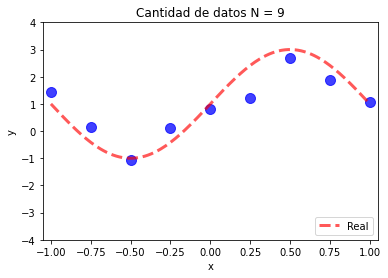

In [ ]:
## Creación de datos sintéticos

# Variable independiente
x = np.arange(-1.00, 1.01, 0.25)

# Para generar una relación cúbica usamos la función polyval y le agregamos ruido normal
a = 2.00
b = 1.00

y = a * np.sin(np.pi*x) + b
y += np.random.normal(loc = 0.00, scale = 0.50, size = len(x))

# Creemos un dataframe para reutilizar estos mismos datos más adelante
df_sintetico = pd.DataFrame()
df_sintetico['x'] = x
df_sintetico['y'] = y

# Gráfico de los datos
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
df_sintetico.plot(ax = ax, x = 'x', y = 'y', kind = 'scatter', s = 100, color = 'b', alpha = 0.75)
ax.set_title('Cantidad de datos N = {}'.format(df_sintetico.shape[0]))

# Relacion real
x_aux = np.arange(-1.00, 1.01, 0.01)
ax.plot(x_aux, a * np.sin(np.pi*x_aux) + b, '--', color = 'r', linewidth = 3, alpha = 0.65)

ax.legend(['Real'], loc = 4)

ax.set_ylim([-4.00, 4.00])
ax.set_xlim([-1.05, 1.05])

Al observar nuestros datos, notamos que los mismos parecen tiener un mínimo y un máximo, por lo que a la hora de proponer un modelo nos quedamos con el más sencillo que tenga esta propiedad, en este caso, un polinomio de grado 3:
$$ y \sim \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 $$

Por lo tanto, a nuestra variable $x$ le vamos a querer calcular todas sus potencias para incluirlas como variables en el modelo de regresión. Con scikit-learn esto se puede hacer fácilmente, generando todos los [términos polinómicos](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) hasta cierto grado.

**Observación**: una forma de inspeccionar si necesitamos agregar un término no lineal en nuestro modelo de regresión es ajustar un modelo completamente lineal y ver el gráfico de los residuos $(y_i - \hat y_i)$ en función de los valores ajustados $\hat y_i$. Si el grado del polinomio es el correcto, no deberíamos observar ningún patrón en particular acá. Es decir, si nuestro modelo es bueno es error debe ser puro ruido (ver página 93 del libro Introduction to Statistical Learning).

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Primero creamos términos polinómicos, recordar el objeto "polyfeats" que vamos a usarlo luego.
# Ojo con include_bias: por default es True y genera una columna con todos 1 (= x^0)
# Si dejamos esto en True, es conveniente pedirle luego al modelo lineal que no ajuste la ordenada al origen para evitar confusiones
polyfeats = PolynomialFeatures(degree = 3, include_bias = True)

# Como todo lo de scikit-learn, espera una matrix (X = x.reshape(-1,1))
X = np.array(df_sintetico['x']).reshape(-1, 1)
X_poly = polyfeats.fit_transform(X)

# Ver que tenemos columas x^0, x^1, x^2, x^3
print(X_poly)

[[ 1.       -1.        1.       -1.      ]
 [ 1.       -0.75      0.5625   -0.421875]
 [ 1.       -0.5       0.25     -0.125   ]
 [ 1.       -0.25      0.0625   -0.015625]
 [ 1.        0.        0.        0.      ]
 [ 1.        0.25      0.0625    0.015625]
 [ 1.        0.5       0.25      0.125   ]
 [ 1.        0.75      0.5625    0.421875]
 [ 1.        1.        1.        1.      ]]


Esta última variable tiene toda la información de $x$ y sus potencias a incluir en el ajuste. Lo que queda es hacer una regresión múltiple de $y$ con respecto a esta matriz de potencias de $x$.

In [ ]:
## Creación y ajuste del modelo

# Creación del modelo lineal, idéntico al caso de una sola variable
# Al poner fit_intercept = False, todos los coeficientes del modelo están en el atributo ".coef_"
# Esto último es deseable si antes ponemos PolynomialFeatures(include_bias = True)
reg = LinearRegression(fit_intercept = False)

# Ajuste del modelo con los términos polinómicos
reg.fit(X_poly, df_sintetico['y'])

# Coeficientes del modelo, el orden corresponde a las columnas de X_poly
print('Coeficientes = {}'.format(reg.coef_))

Coeficientes = [ 0.68290836  3.82934761  0.57480381 -4.07633913]


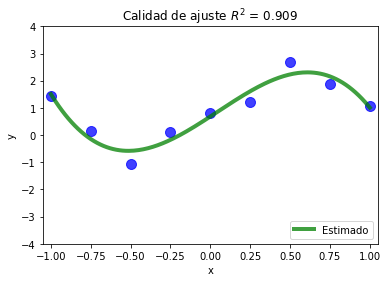

In [ ]:
## Graficos
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

# Puntos de entrenamiento
df_sintetico.plot(ax = ax, x = 'x', y = 'y', kind = 'scatter', s = 100, color = 'b', alpha = 0.75)

# Relacion estimada
# (usamos np.flip que invierte el orden de los coeficientes,
# ya que polyval los toma en orden diferente a lo que devuelve reg.coef_)
# Tomamos un rango mas fino de x para dibujar la curva más suave.
x_aux = np.arange(-1.00, 1.01, 0.01)
y_estimado = np.polyval(np.flip(reg.coef_), x_aux)
ax.plot(x_aux, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

# Calidad del ajuste
ax.set_title('Calidad de ajuste $R^2$ = {:.3f}'.format(reg.score(X_poly, df_sintetico['y'])))

ax.set_ylim([-4.00, 4.00])
ax.set_xlim([-1.05, 1.05])

ax.legend(['Estimado'], loc = 4)
plt.show()

#### Predicción

Con los coeficientes ajustados podemos predecir el valor de $y$ para nuevos valores de $x$ no incluidos en los datos de entrenamiento (en realidad, ya lo hicimos al dibujar la curva verde...).


In [ ]:
# Para predecir nuevos valores tenemos que primero calcular todos los términos polinómicos
x_nuevos = np.array([-0.3, 0.97, 0.17])
X_poly_nuevos = polyfeats.fit_transform(x_nuevos.reshape(-1, 1))
y_predichos = reg.predict(X_poly_nuevos)

print(y_predichos)

[-0.30410242  1.21784378  1.33048223]


### Interacción

¿Qué pasa si tenemos varias variables independientes? ¿Cómo incluímos términos de interacción?

Si por ejemplo, $y$ dependiera de dos variables $x$ y $z$ con la forma $y \sim sin(x*z)$, muchas veces vamos a querer tener un modelo que incluya lo que se llaman términos interactuantes, además de la potencias de cada una de esas variables. Es decir, podríamos querer plantear un modelo de la forma:
$$ y \sim \beta_0 + \beta_1 x + \beta_2 z + \beta_3 x^2 + \beta_4 z^2 + \beta_5 xz$$

Con *PolynomialFeatures* podemos crear además las interacciones entre las variables:

In [ ]:
# Ejemplo de crear términos interactuantes
x = np.linspace(-1.00, 1.00, 10)
z = np.linspace(0.00, 2.00, 10)

polyfeats = PolynomialFeatures(degree = 2, include_bias = True, interaction_only = False)

# Creamos una matriz donde cada fila sea una par (x,z)
X = np.array([[x[i], z[i]] for i in range(len(x))])
X_poly = polyfeats.fit_transform(X)

# Notar que la primer columna es de bias, luego viene el primer orden,
# luego los segundos y el penúltimo término es la interacción x*z
print(X_poly)

[[ 1.         -1.          0.          1.         -0.          0.        ]
 [ 1.         -0.77777778  0.22222222  0.60493827 -0.17283951  0.04938272]
 [ 1.         -0.55555556  0.44444444  0.30864198 -0.24691358  0.19753086]
 [ 1.         -0.33333333  0.66666667  0.11111111 -0.22222222  0.44444444]
 [ 1.         -0.11111111  0.88888889  0.01234568 -0.09876543  0.79012346]
 [ 1.          0.11111111  1.11111111  0.01234568  0.12345679  1.2345679 ]
 [ 1.          0.33333333  1.33333333  0.11111111  0.44444444  1.77777778]
 [ 1.          0.55555556  1.55555556  0.30864198  0.86419753  2.41975309]
 [ 1.          0.77777778  1.77777778  0.60493827  1.38271605  3.16049383]
 [ 1.          1.          2.          1.          2.          4.        ]]


Una vez que tenemos esta matriz de potencias y términos interactuantes, si tenemos un variable dependiente $y$, el método de regresión sigue exactamente igual. Solamente hay que tener cuidado con saber el orden de los coeficientes, a qué término corresponde cada uno. Ver además la opciones de *PolynomialFeatures* donde podemos generar además solamente los términos interactuantes si así lo quisieramos.

## Concepto de sobreajuste u [overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)

En el ejemplo anterior, propusimos un polinomio de grado 3 dado que más o menos intuímos que este era el modelo más sencillo para captar la forma de nuestros datos. Sin embargo, qué pasa si proponemos otros modelos?

En el siguiente ejemplo, vamos a ajustar polinomios de distinto grado y ver qué tan bien les va al ajustar sobre los datos:

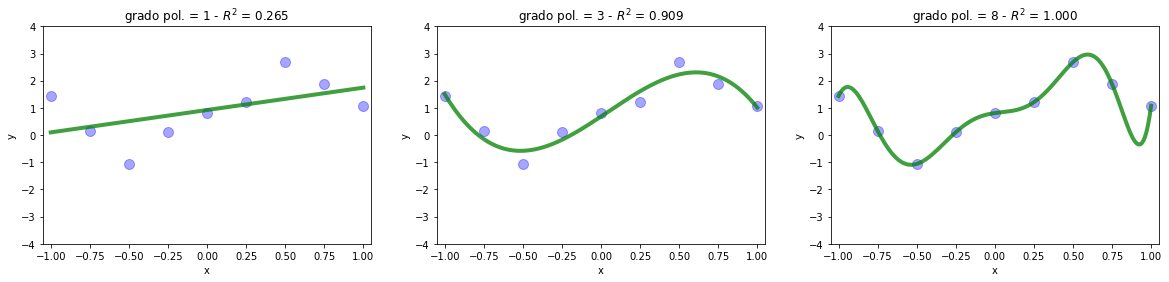

In [ ]:
# Creación del modelo
reg = LinearRegression(fit_intercept = False)

# Graficos
fig, ax = plt.subplots(1, 3, figsize = (20, 4))

fig_index = 0
# Barremos en grado de polinomios
for degree in [1, 3, 8]:

  # Para cada grado generamos los términos polinómicos correspondientes
  polyfeats = PolynomialFeatures(degree = degree, include_bias = True)
  X = np.array(df_sintetico['x']).reshape(-1, 1)
  X_poly = polyfeats.fit_transform(X)

  # Ajuste del modelo con los términos polinómicos
  reg.fit(X_poly, df_sintetico['y'])

  # Puntos de entrenamiento
  df_sintetico.plot(ax = ax[fig_index], x = 'x', y = 'y', kind = 'scatter', s = 100, color = 'b', alpha = 0.35)

  # Relacion estimada
  x_aux = np.arange(-1.00, 1.01, 0.01)
  y_estimado = np.polyval(np.flip(reg.coef_), x_aux)
  ax[fig_index].plot(x_aux, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

  # Grado del polinomio y calidad del ajuste
  ax[fig_index].set_title('grado pol. = {} - $R^2$ = {:.3f}'.format(degree, reg.score(X_poly, df_sintetico['y'])))

  ax[fig_index].set_ylim([-4.00, 4.00])
  ax[fig_index].set_xlim([-1.05, 1.05])

  fig_index += 1

plt.show()

¿Qué vemos?

- Al ajustar un polinomio de grado 1, vemos que el modelo representa un ajuste bastante pobre de los datos, ya que los mismos tienen una variabilidad que la recta no puede captar. Esta situación, donde tenemos un modelo que parece muy sencillo e incapaz de captar la variabilidad de los datos se denomina **underfitting**.

- A medida que aumentamos el grado del polinomio, nuestro modelo tiene más grados de libertad para captar cómo varían los datos, aumentando la calidad del ajuste. Sin embargo, sabemos que los datos pueden tener un poco de ruido y por lo tanto tal vez no querramos describir exactamente la variabilidad de los mismo, sino simplemente captar la tendencia.

- Dado que nuestro dataset sintético consta de 9 datos, un polinomio de grado 8 ya tiene suficiente cantidad de grados de libertad para ajustar y pasar exactamente por todos los datos. Esto es lo que se denomina como **overfitting**.

Si bien alguien podría decir que no ve el problema de captar en una única fórmula la relación entre $x$ e $y$ observada en los datos, el problema del **overfitting** es cuando tratamos de aplicar el modelo para explicar nuevos datos. Este problema lo vemos a continuación.

#### [Trade-off sesgo-varianza](http://scott.fortmann-roe.com/docs/BiasVariance.html)

El problema del underffiting y y overfitting se da cuando queremos utilizar nuestro modelo para explicar datos nuevos. En el siguiente experimento vamos a ajustar polinomios de distinto grado a nuestro set de datos pero vamos a ver además qué tan bien le va al modelo cuando le tiramos datos nuevos, generados a partir de conocer la relación real entre $x$ e $y$ (ver observación hecha más abajo).

Entonces el experimento consiste en lo siguiente: ajustamos distintos polinomios a nuestros datos y luego calculamos el $R^2$ de nuestro ajuste sobre datos nuevos, para ver qué tan bien nos va...


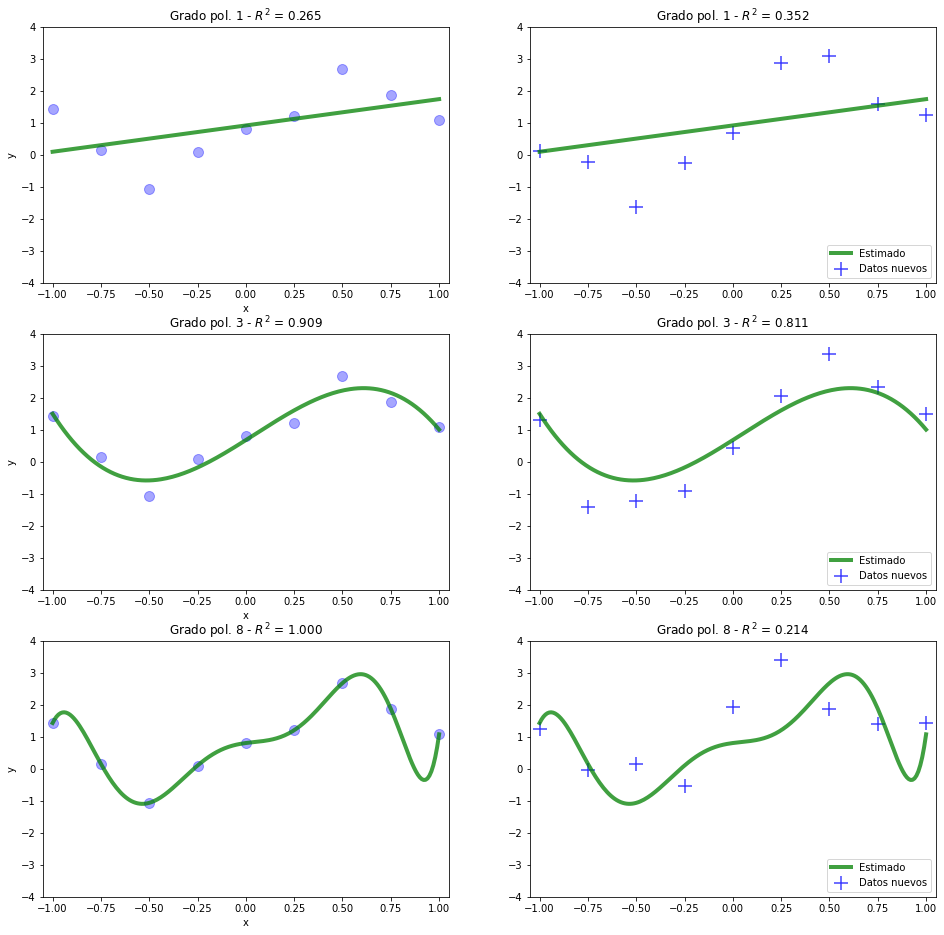

In [ ]:
## Ajuste del modelo

reg = LinearRegression(fit_intercept = False)

## Graficos
fig, ax = plt.subplots(3, 2, figsize = (16, 16))

degree_index = 0

# Barremos en grado de polinomio
for degree in [1, 3, 8]:

  # Creación de términos polinómicos
  polyfeats = PolynomialFeatures(degree = degree, include_bias = True)

  # Variable independiente
  X = np.array(df_sintetico['x']).reshape(-1, 1)

  X_poly = polyfeats.fit_transform(X)

  # Ajuste del modelo con los términos polinómicos
  reg.fit(X_poly, df_sintetico['y'])

  # Puntos de entrenamiento
  df_sintetico.plot(ax = ax[degree_index, 0], x = 'x', y = 'y', kind = 'scatter', s = 100, color = 'b', alpha = 0.35)

  # Relacion estimada
  x_aux = np.arange(-1.00, 1.01, 0.01)
  y_estimado = np.polyval(np.flip(reg.coef_), x_aux)
  ax[degree_index, 0].plot(x_aux, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

  # Grado del polinomio y calidad del ajuste
  ax[degree_index, 0].set_title('Grado pol. {} - $R^2$ = {:.3f}'.format(degree, reg.score(X_poly, df_sintetico['y'])))

  #### Acá generamos nuevos datos!

  # Variable dependiente
  a = 2.00
  b = 1.00
  x_new = np.arange(-1.00, 1.01, 0.25)
  y_new = a * np.sin(np.pi*x_new) + b
  y_new += np.random.normal(loc = 0.00, scale = 0.50, size = len(x_new))

  # Graficamos los nuevos datos
  ax[degree_index, 1].scatter(x_new, y_new, s = 200, marker = '+', color = 'b', alpha = 0.75)

  # Grafico tambien la curva estimada superpuesto con los nuevos datos
  ax[degree_index, 1].plot(x_aux, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

  # Grado del polinomio y calidad del ajuste para los datos nuevos
  X_poly_new = polyfeats.fit_transform(np.array(x_new).reshape(-1, 1))
  ax[degree_index, 1].set_title('Grado pol. {} - $R^2$ = {:.3f}'.format(degree, reg.score(X_poly_new, y_new)))

  ax[degree_index, 0].set_ylim([-4.00, 4.00])
  ax[degree_index, 0].set_xlim([-1.05, 1.05])

  ax[degree_index, 1].set_ylim([-4.00, 4.00])
  ax[degree_index, 1].set_xlim([-1.05, 1.05])

  ax[degree_index, 1].legend(['Estimado', 'Datos nuevos'], loc = 4)

  degree_index += 1

plt.show()

Bien, qué pasó?
- Cuando ajustamos un polinomio de grado 1, estamos haciendo underfitting. Nuestro modelo tiene pocos grados de libertad, no logra captar la variabilidad de nuestros datos y no hace un buen ajuste en nuestro datos de entrenamiento. Al presentarle nuevos datos, el error o al menos la apariencia del ajuste es la misma, es decir, le erra a los puntos nuevos tanto como le erraba a los datos de entrenamiento.
- Cuando le pegamos a un modelo atinado (como el polinomio de grado 3) este logra captar la variabilidad de los datos y es robusto ante nuevos datos, es decir, a pesar de nunca haberlos visto, el modelo capta igualmente la variabilidad de los mismos y el error que comete es prácticamente el mismo tanto en el set de ajuste como en el de datos nuevos.
- ¿Qué pasa al sobreajustar? Cuando planteamos un modelo que sobreajusta los datos, como es el caso del polinomio de grado 8, este capta toda la variabilidad de los datos sobre los que se ajusta, pero no logra abstraer la tendencia subyacente de los mismos. Por lo tanto al presentarle nuevos datos, como gran parte de la variabilidad viene de ruido, el modelo tiene una pobre performance para explicarlos. Es decir, sobreajustar es muy malo para extrapolar a datos nuevos.

Cuando un modelo sobreajusta (que sucede cuando el mismo tiene muchos parámetros libres), el error sobre nuevos datos fluctúa mucho, por lo que se dice que tiene una gran **varianza**. Por otro lado, cuando un modelo subajusta, en general es porque estamos forzándolo a tener pocos parámetros libres. En este caso se dice que el modelo tiene un **sesgo** alto, algo así como que estamos convencidos que el modelo tiene que ser sí o sí simple.

Otra forma de pensar en esto es que si tenemos un modelo que sobreajusta, al cambiar los datos sobre los cuales ajusta, el modelo va a presentar coeficientes muy distintos (mayor variabilidad en la variación de los parámetros), mientras que un modelo que subajuste se va a ver poco afectado:





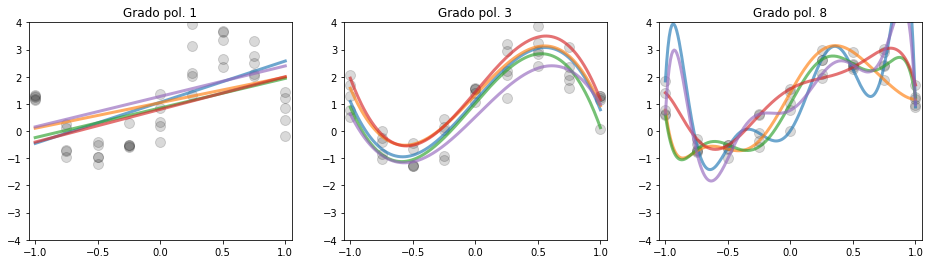

In [ ]:
## Ajuste del modelo

reg = LinearRegression(fit_intercept = False)

## Graficos
fig, ax = plt.subplots(1, 3, figsize = (16, 4))

degree_index = 0
# Barremos en grado de polinomio
for degree in [1, 3, 8]:

  # Creación de términos polinómicos
  polyfeats = PolynomialFeatures(degree = degree, include_bias = True)

  # Variable independiente
  X = np.array(df_sintetico['x']).reshape(-1, 1)

  X_poly = polyfeats.fit_transform(X)

  # Por cada grado, hacemos 5 ajustes distintos
  for iteration in range(5):

    # Variable dependiente
    a = 2.00
    b = 1.00
    y_new = a * np.sin(np.pi*df_sintetico['x']) + b
    y_new += np.random.normal(loc = 0.00, scale = 0.50, size = len(df_sintetico['x']))

    # Ajuste del modelo con los términos polinómicos
    reg.fit(X_poly, y_new)

    # Graficamos los nuevos datos
    ax[degree_index].scatter(df_sintetico['x'], y_new, s = 100, color = 'k', alpha = 0.15)

    # Relacion estimada
    x_aux = np.arange(-1.00, 1.01, 0.01)
    y_estimado = np.polyval(np.flip(reg.coef_), x_aux)
    ax[degree_index].plot(x_aux, y_estimado, linestyle = '-', linewidth = 3, alpha = 0.65)

    # Grado del polinomio y calidad del ajuste
    ax[degree_index].set_title('Grado pol. {}'.format(degree))

    ax[degree_index].set_ylim([-4.00, 4.00])
    ax[degree_index].set_xlim([-1.05, 1.05])

  degree_index += 1

plt.show()

Al compromiso entre modelos simples (con poca varianza) pero no tan simples (poco sesgo) se lo denomina **trade-off sesgo-varianza**.
Lo que vamos a perseguir siempre son modelos con bajo sesgo y poca varianza, de forma tal que puedan por un lado captar la variabilidad de mis datos pero a la vez tener capacidad de abstracción que permita explicar datos nuevos.

**Observación**: Los datos nuevos los generamos con la misma relación dado que la conocemos. En un contexto real de análisis de datos muchas veces solamente esto de generar nuevos datos va a ser imposible, ya que solo contamos con un único dataset.
Por lo tanto, en la práctica lo que se suele hacer es separar una porción de nuestros datos que la vamos a usar como testeo y ajustar nuestro modelo en los datos restantes (datos de entrenamiento). Esto lo vamos a ver en futuras clases.

#### Más datos es mejor...

Veamos un pequeño experimento en el cual se pone de manifiesto que el sobreajuste sucede cuando la cantidad de parámetros libres que tiene nuestro modelo es del orden de la cantidad de datos que disponemos. En nuestro ejemplo, partímos de tan solo 9 datos, por lo que un polinomio de grado 8 alcanza para ajustar perfectamente todos los datos. Pero si dejásemos fijo el grado y aumentamos la cantidad de datos, qué pasa?

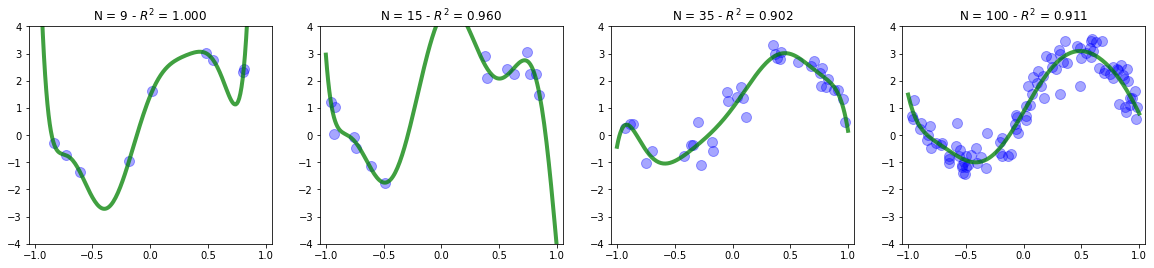

In [ ]:
## Ajuste del modelo

# Fijamos el grado de nuestro polinomio en 8
degree = 8
polyfeats = PolynomialFeatures(degree = degree, include_bias = True)

# Creamos el modelo lineal
reg = LinearRegression(fit_intercept = False)

## Graficos
fig, ax = plt.subplots(1, 4, figsize = (20, 4))

fig_index = 0

# Vamos a barrer en cantidad de datos, mantiniendo la misma relación cúbica entre x e y
for N in [9, 15, 35, 100]:

  # Variable independiente, creamos distinta cantidad de datos
  x = 2 * np.random.random(size = N) - 1
  X = x.reshape(-1, 1)

  # Variable dependiente
  a = 2.00
  b = 1.00
  y = a * np.sin(np.pi*x) + b
  y += np.random.normal(loc = 0.00, scale = 0.50, size = len(x))

  # Creación de términos polinómicos
  X_poly = polyfeats.fit_transform(X)

  # Ajuste del modelo con los términos polinómicos
  reg.fit(X_poly, y)

  # Puntos de entrenamiento
  ax[fig_index].scatter(x, y, color = 'b', alpha = 0.35, s = 100)

  # Relacion estimada
  x_aux = np.arange(-1.00, 1.01, 0.01)
  y_estimado = np.polyval(np.flip(reg.coef_), x_aux)
  ax[fig_index].plot(x_aux, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

  # Grado del polinomio y calidad del ajuste
  ax[fig_index].set_title('N = {} - $R^2$ = {:.3f}'.format(N, reg.score(X_poly, y)))

  ax[fig_index].set_ylim([-4, 4])
  ax[fig_index].set_xlim([-1.05, 1.05])

  fig_index += 1

plt.show()

Lo que podemos observar es que en la región donde la cantidad de parámetros libres de nuestro modelo es muy baja respecto de la cantidad de datos (por ejemplo, para $N = 100$), tarde o temprano la verdadera relación entre los datos sale a la luz y el sobreajuste se pierde. Por fuera de la región donde están nuestros datos, ya es una cuestión de fe...

## Regularización

Una observación que podemos hacer es que cuando tenemos un polinomio que sobreajusta los datos, en general los coeficientes tienden a tener valores absolutos altos, que se traduce en el gráfico como variaciones abruptas en el poliniomio ajustado. Por lo tanto, una solución al tema del sobreajuste viene dado por lo que se conoce como **regularización**, que básicamente consiste en penalizar valores altos en nuestros coeficientes.

Un ejemplo muy utilizado es el que se conoce como [*ridge regression*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn-linear-model-ridge), que consiste en buscar los coeficientes de nuestro modelo buscando minimizar la siguiente expresión, más general que la utilizada en cuadrados mínimos:
$$ \text{RSS} = \sum_i (y_i - \hat y_i)^2 + \alpha \sum_{j=1}^M \hat \beta_j^2 $$
Es decir, minimiza la suma de los residuos al cuadrado más un término que penaliza valores altos de los coeficientes, donde $M$ es el grado del polinomio. En el término de penalización, no se incluye la ordenada al origen ($\beta_0$).
Con esto esperamos que si proponemos un polinomio de grado muy alto (mejor dicho, del orden de la cantidad de datos que tenemos), el término de penalización no permita que los coeficientes se vayan de escala.

Otros ejemplos de técnicas de regularización muy utlizadas son: [*lasso regression*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), que en vez de proponer como término de regularización la suma de los cuadrados de los coeficientes, propone la suma de sus valores absolutos; y [elastic net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet), que es una combinación de *ridge* y *lasso*.

Veamos cómo mejora el sobreajuste que hicimos con un polinomio de grado 8 en nuestro dataset de tan solo 9 datos cuando le agregamos un término de regularización.

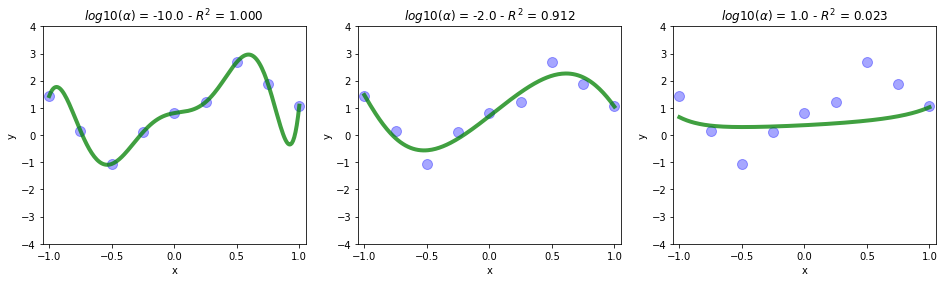

In [ ]:
# Importamos el modelo ridge
from sklearn.linear_model import Ridge

degree = 8
# Creación de términos polinómicos
polyfeats = PolynomialFeatures(degree = degree, include_bias = True)
X = np.array(df_sintetico['x']).reshape(-1, 1)
X_poly = polyfeats.fit_transform(X)

# Graficos
fig, ax = plt.subplots(1, 3, figsize = (16, 4))

fig_index = 0

# Barremos para distintos valores del parámetro de regularización
for alpha_reg in [10**-10, 10**-2, 10]:

  # Creamos el modelo ridge
  # Notar que la sintaxis de ridge es la misma que para el modelo lineal
  reg = Ridge(alpha = alpha_reg, fit_intercept = False)

  # Ajuste del modelo con los términos polinómicos
  reg.fit(X_poly, df_sintetico['y'])

  # Puntos de entrenamiento
  df_sintetico.plot(ax = ax[fig_index], x = 'x', y = 'y', kind = 'scatter', s = 100, color = 'b', alpha = 0.35)

  # Relacion estimada
  x_aux = np.arange(-1.00, 1.01, 0.01)
  y_estimado = np.polyval(np.flip(reg.coef_), x_aux)
  ax[fig_index].plot(x_aux, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

  # Valor del parámetro regularizador y calidad del ajuste
  ax[fig_index].set_title('$log10(\\alpha)$ = {} - $R^2$ = {:.3f}'.format(np.log10(alpha_reg), reg.score(X_poly, df_sintetico['y'])))

  ax[fig_index].set_ylim([-4, 4])
  ax[fig_index].set_xlim([-1.05, 1.05])

  fig_index += 1

plt.show()

Lo que podemos ver de los gráficos anteriores es que para este dataset un valor de $\alpha = 10^{-2}$ pareciera devolver un polinomio mucho más "estable" que lo que vemos para $\alpha = 10^{-10}$, que se corresponde con práctimente no tener ningún término de regularización.

Por otro lado, también observamos que si aumentamos mucho $\alpha$, el polinomio tiende a una línea recta, es decir, un polinomio de grado 0. Esto se debe a que un término de penalización alto mata todos los coeficientes del modelo, salvo el $\beta_0$ excluído de dicho término.

Veamos si efectivamente agregar regularización nos evita hacer sobreajuste. Repitamos el experimento de generar datos nuevos (provenientes de la misma población de nuestros datos originales) y veamos si nuestro ajuste es robusto al cambiar los datos:

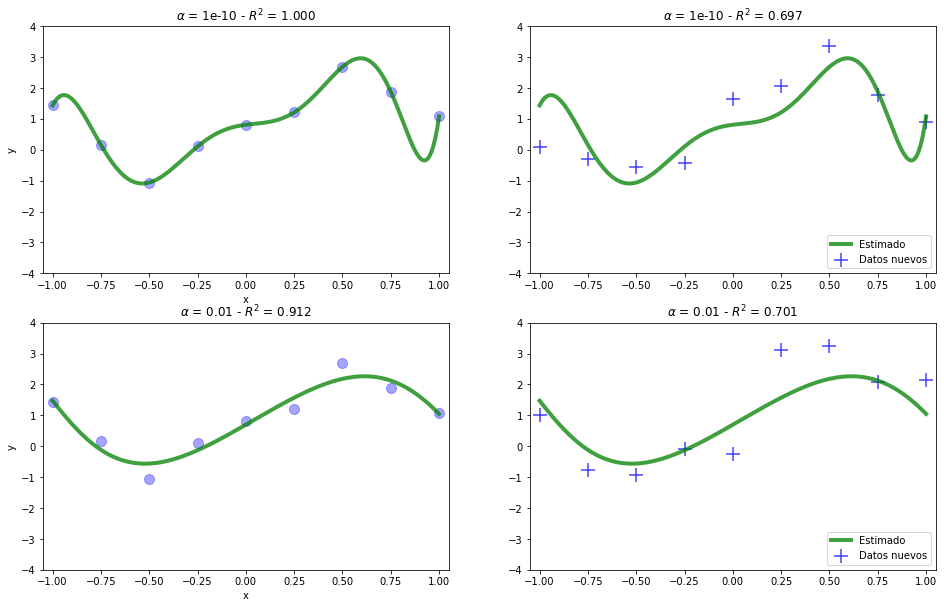

In [ ]:
## Graficos
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

# Variable independiente
X = np.array(df_sintetico['x']).reshape(-1, 1)

# Creación de términos polinómicos
X_poly = polyfeats.fit_transform(X)

alpha_index = 0
# Barremos en valores del parámetro alpha
for alpha_reg in [10**-10, 10**-2]:

  # Creamos el modelo ridge
  reg = Ridge(alpha = alpha_reg, fit_intercept = False)

  # Ajuste del modelo con los términos polinómicos
  reg.fit(X_poly, df_sintetico['y'])

  # Puntos de entrenamiento
  df_sintetico.plot(ax = ax[alpha_index, 0], x = 'x', y = 'y', kind = 'scatter', s = 100, color = 'b', alpha = 0.35)

  # Relacion estimada
  x_aux = np.arange(-1.00, 1.01, 0.01)
  y_estimado = np.polyval(np.flip(reg.coef_), x_aux)
  ax[alpha_index, 0].plot(x_aux, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

  # Grado del polinomio y calidad del ajuste
  ax[alpha_index, 0].set_title('$\\alpha$ = {} - $R^2$ = {:.3f}'.format(alpha_reg, reg.score(X_poly, df_sintetico['y'])))

  # Nuevos datos!

  # Variable dependiente
  a = 2.00
  b = 1.00
  x_new = np.arange(-1.00, 1.01, 0.25)
  y_new = a * np.sin(np.pi*x_new) + b
  y_new += np.random.normal(loc = 0.00, scale = 0.50, size = len(x_new))

  ax[alpha_index, 1].scatter(x_new, y_new, s = 200, marker = '+', color = 'b', alpha = 0.75)

  # Grafico tambien el estimado
  ax[alpha_index, 1].plot(x_aux, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

  # Grado del polinomio y calidad del ajuste
  X_poly_new = polyfeats.fit_transform(np.array(x_new).reshape(-1, 1))
  ax[alpha_index, 1].set_title('$\\alpha$ = {} - $R^2$ = {:.3f}'.format(alpha_reg, reg.score(X_poly_new, y_new)))

  ax[alpha_index, 0].set_ylim([-4.00, 4.00])
  ax[alpha_index, 0].set_xlim([-1.05, 1.05])

  ax[alpha_index, 1].set_ylim([-4.00, 4.00])
  ax[alpha_index, 1].set_xlim([-1.05, 1.05])

  ax[alpha_index, 1].legend(['Estimado', 'Datos nuevos'], loc = 4)

  alpha_index += 1

plt.show()

En la primer fila vemos el ajuste con un polinomio de grado 8 prácticamente sin regularización y en la segunda fila con un término de penalización considerable. Lo que efectivamente vemos es que con un término de regularización razonable, el modelo capta bien la variabilidad de los datos nuevos y no sobreajusta a un dataset en particular, a pesar de que el grado del polinomio que propusimos es del orden de la cantidad de datos que tenemos.

Lo que está haciendo la regularización es tomar un modelo con mucha varianza y disminuirla al costo de aumentar el sesgo (estamos haciendo un modelo más simple al bajar el peso de los coeficientes). Conclusión, no tenemos que preocuparnos con elegir el grado del polinomio: podemos exagerar todo lo que querramos, siempre y cuando elijamos bien el término de regularización..., ¿y cómo hacemos esto?

## ¿Cómo solucionar el trade-off sesgo-varianza, elegir correctamente el grado del polinomio y el parámetro de regularización?
Todas, todas, las preguntas de cómo elegimos un buen grado de polinomio, cómo elegimos un buen parámetro de regularización, qué hacemos si no podemos generar datos nuevos para ver la performance de nuestro modelo, lo vamos a ver en futuras clases cuando veamos la separación en datos de entrenamiento y testeo (*test-train set*) y validación cruzada
(*cross-validation*).